In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('ml.csv', index_col='Unnamed: 0', parse_dates=['buy_date', 'sell_date'])
data = data.drop(columns = ['industry','avg'],axis = 1)

data.dropna(how='any', inplace=True)
dbacktest = data[data['buy_date'] > '2019']
dataTrainTest = data[data['sell_date'] < '2019']
dtrain, dtest = train_test_split(dataTrainTest, test_size=0.10, random_state=42)
features = data.columns[6:-1]

In [10]:
from sklearn import preprocessing
dtrain_normalized = preprocessing.normalize(dtrain[features], norm='l2')
dtest_normalized = preprocessing.normalize(dtest[features], norm='l2')
dbacktest_normalized = preprocessing.normalize(dbacktest[features], norm='l2')

In [3]:
# randomForest
from sklearn.ensemble import RandomForestClassifier
import random


# 創建機器學習的model
rf = RandomForestClassifier(n_estimators=57, criterion='gini', 
                            max_depth=15, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, 
                            bootstrap=True, oob_score=False, n_jobs=1, 
                            random_state=0, verbose=0, warm_start=False, 
                            class_weight=None)

random.seed(10)
rf = rf.fit(dtrain[features],dtrain['profit'] > 1)
score = rf.score(dtest[features],dtest['profit'] > 1)
score

0.7783641160949868

In [6]:
#DecisionTreeClassifier
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion="entropy"
                                          ,random_state = 30
                                          ,splitter = "random"
                                          ,max_depth = 16   #測試條件
                                          )
tree_clf = tree_clf.fit(dtrain[features],dtrain['profit'] > 1)

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse', 
                            max_depth=4, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None,
                            random_state=None)
tree_dtr = dtr.fit(dtrain_normalized,dtrain['profit'])

In [29]:
%matplotlib inline
dcresult = tree_clf.predict(dbacktest[features])
rfresult = rf.predict(dbacktest[features])
dtrresult = tree_dtr.predict(dbacktest_normalized)


dbacktest['dtr_prediction'] = pd.Series(dtrresult, index=dbacktest.index)
dbacktest['dc_prediction'] = pd.Series(dcresult, index=dbacktest.index)
dbacktest['rf_prediction'] = pd.Series(rfresult, index=dbacktest.index)
dates = list(set(dbacktest['sell_date']))
dates.sort()

dtr_history = []
dc_history = []
rf_history = []
for d in dates:
    rf_history.append(dbacktest[(dbacktest['sell_date'] == d) & (dbacktest['rf_prediction'])]['profit'].mean())
    dc_history.append(dbacktest[(dbacktest['sell_date'] == d) & (dbacktest['dc_prediction'])]['profit'].mean())
    dtr_history.append(dbacktest[(dbacktest['sell_date'] == d) & (dbacktest['dtr_prediction'])]['profit'].mean())


<ipython-input-29-c50fde53124f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbacktest['dtr_prediction'] = pd.Series(dtrresult, index=dbacktest.index)
<ipython-input-29-c50fde53124f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbacktest['dc_prediction'] = pd.Series(dcresult, index=dbacktest.index)
<ipython-input-29-c50fde53124f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

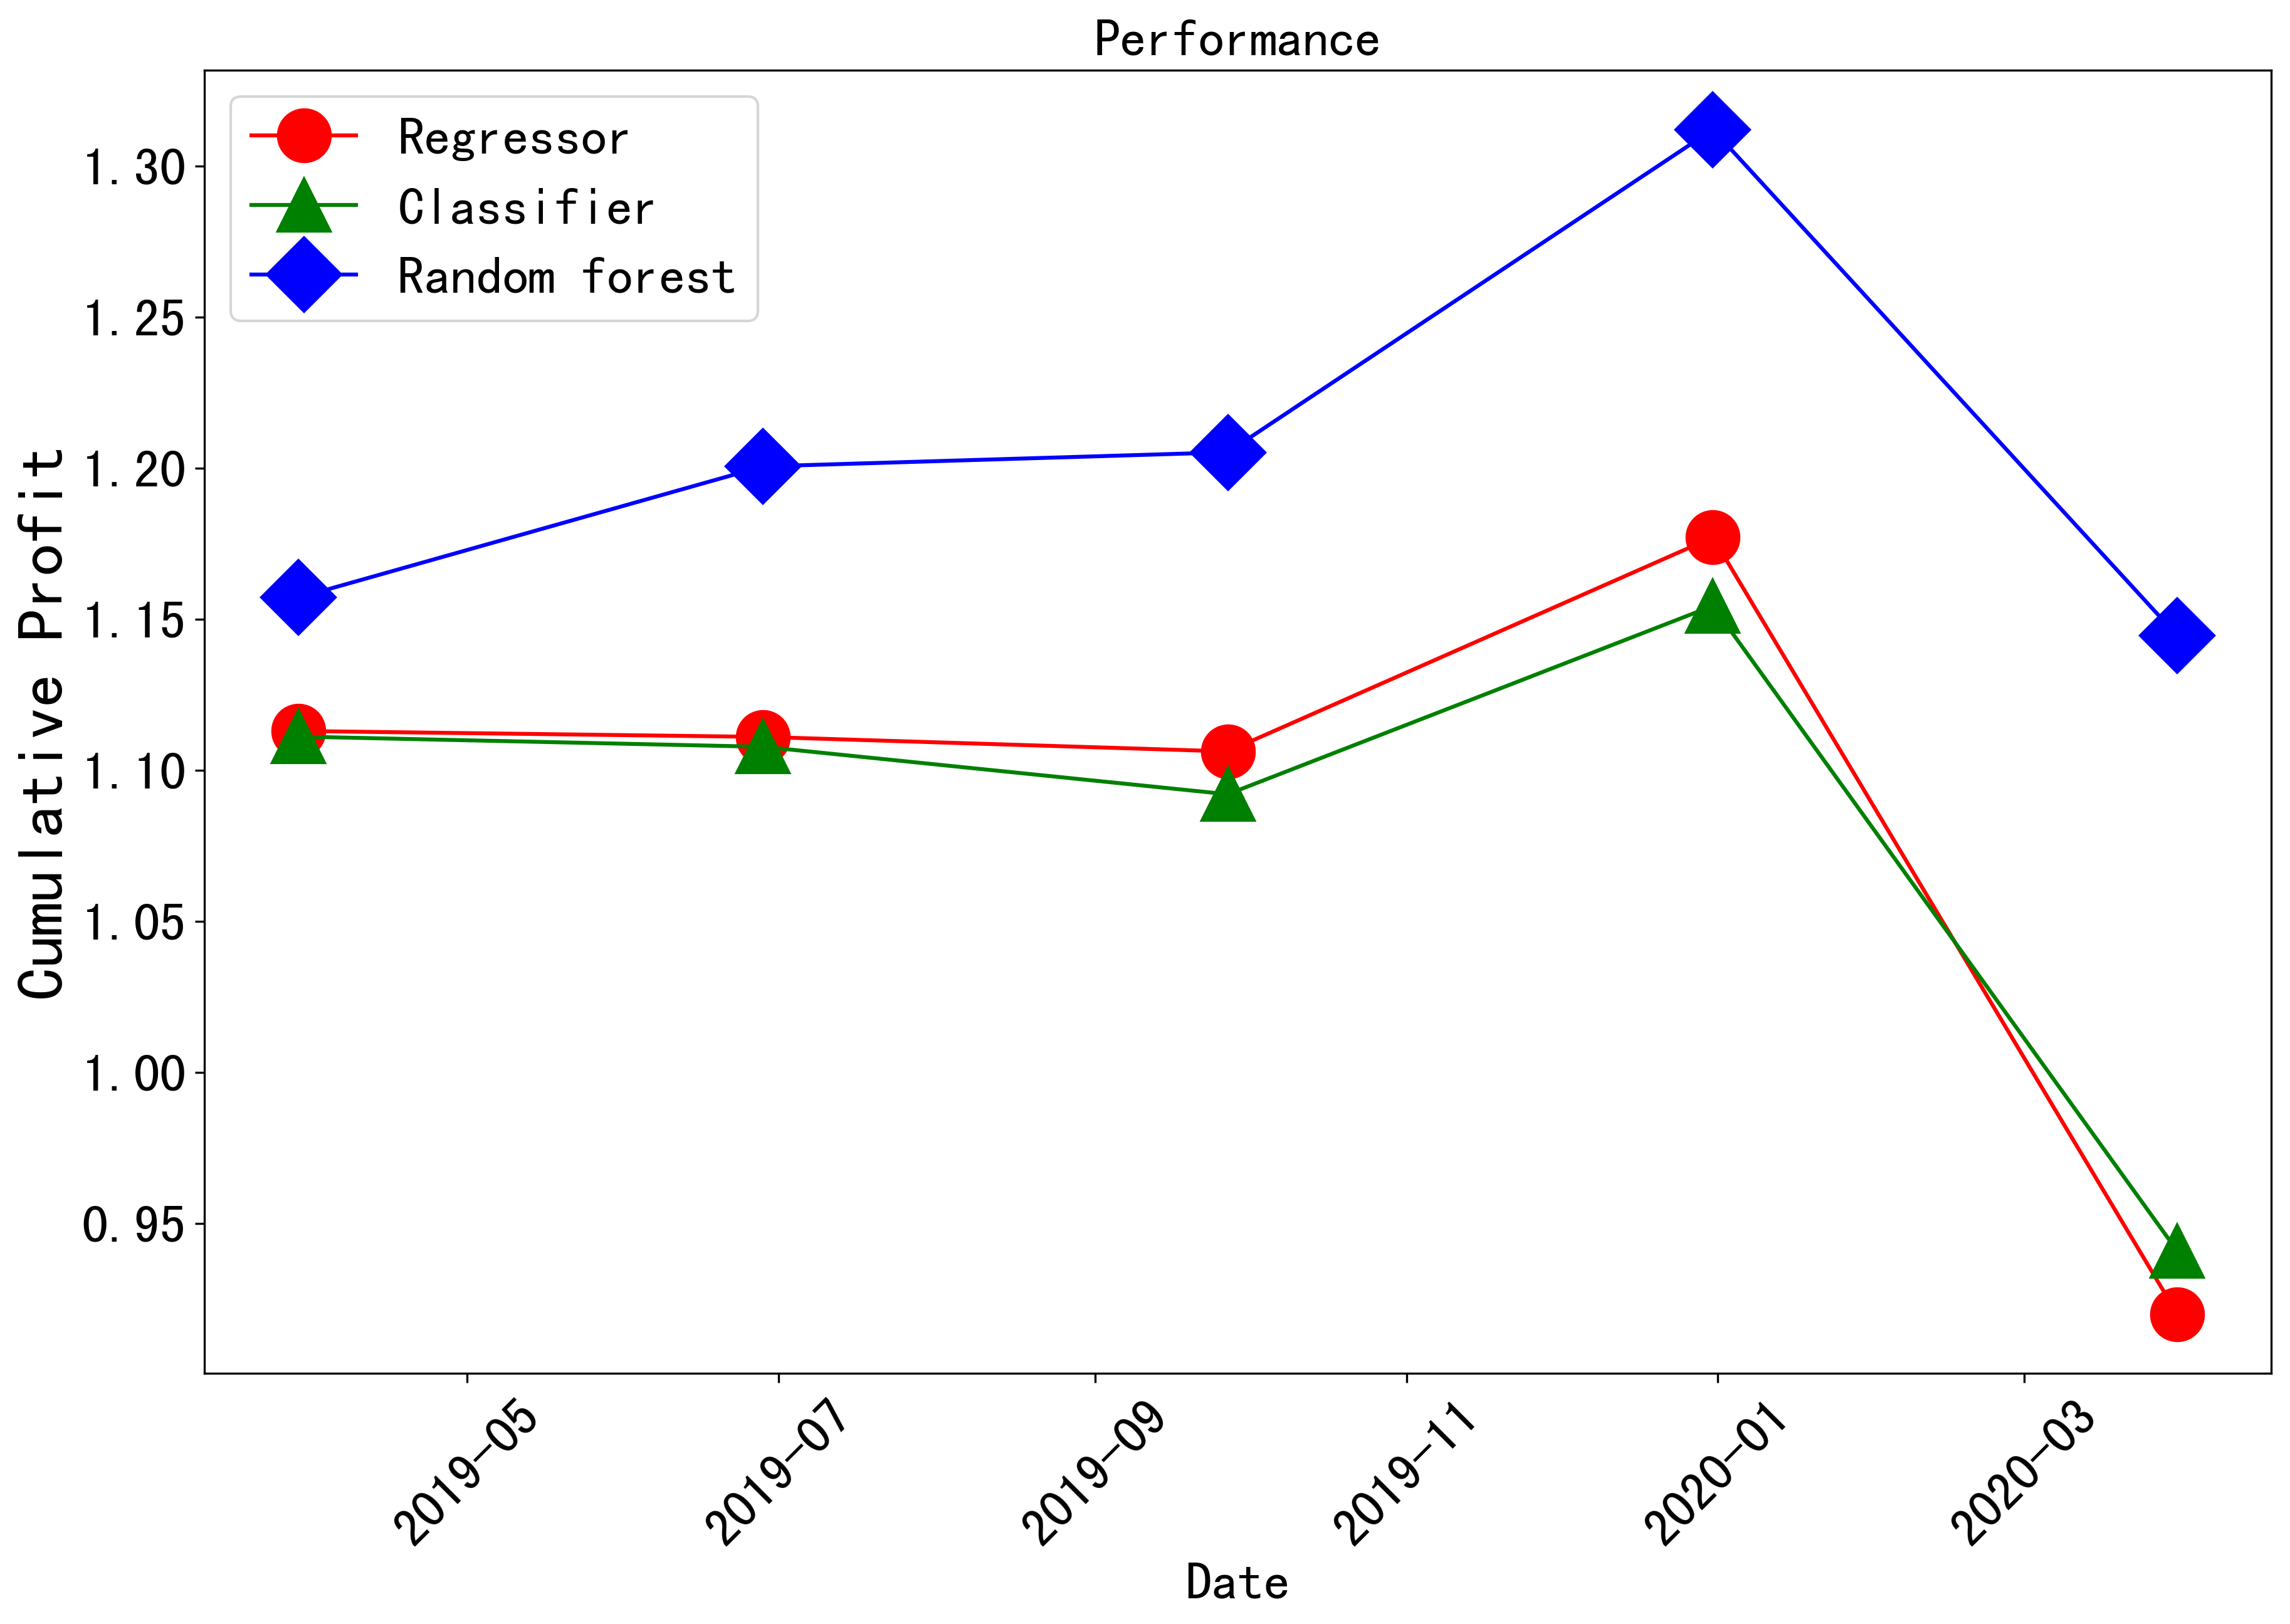

In [34]:
# 引入模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = [12,8],dpi = 300)

plt.title('Performance', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Cumulative Profit', fontsize = 25)
# plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
# 避免被圖表元素被蓋住



plt.plot(list(pd.Series(dtr_history, index=dates).cumprod().index), pd.Series(dtr_history, index=dates).cumprod(),color = 'red', label = 'Regressor',marker='o', markerfacecolor='red',markersize = 20)
plt.plot(list(pd.Series(dc_history, index=dates).cumprod().index), pd.Series(dc_history, index=dates).cumprod(), color = 'green', label = 'Classifier',marker='^', markerfacecolor='green',markersize = 20)
plt.plot(list(pd.Series(rf_history, index=dates).cumprod().index), pd.Series(rf_history, index=dates).cumprod(), color = 'blue', label = 'Random forest',marker='D', markerfacecolor='blue',markersize = 20)

plt.legend(fontsize = 20)
plt.tight_layout()
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('Performance.png', dpi=100,pad_inches = 2)
plt.show()